About Dataset
This dataset contains information about used cars.
This data can be used for a lot of purposes such as price prediction to exemplify the use of linear regression in Machine Learning.
The columns in the given dataset are as follows:

name
year
selling_price
km_driven
fuel
seller_type
transmission
Owner
For used motorcycle datasets please go to https://www.kaggle.com/nehalbirla/motorcycle-dataset

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
# from sklearn.encode import OneHotEncode
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

In [2]:
df=pd.read_csv("car data.csv")

In [3]:
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [4]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
print(df['Seller_Type'].unique())
print(df['Fuel_Type'].unique())
print(df['Transmission'].unique())
print(df['Owner'].unique())

['Dealer' 'Individual']
['Petrol' 'Diesel' 'CNG']
['Manual' 'Automatic']
[0 1 3]


In [8]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

# Final Dataset

In [9]:
final_df=df[['Year','Selling_Price','Present_Price','Kms_Driven','Fuel_Type','Transmission']]

In [10]:
final_df['Current_Year']=2022

<ipython-input-10-d690ff54b731>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Current_Year']=2022


In [11]:
final_df['no_Year']=final_df['Year']-final_df['Current_Year']

<ipython-input-11-b32e9ae18a71>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['no_Year']=final_df['Year']-final_df['Current_Year']


In [12]:
final_df.drop(['Current_Year'],axis=1,inplace=True)

C:\Users\hp\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [13]:
final_df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Transmission,no_Year
0,2014,3.35,5.59,27000,Petrol,Manual,-8
1,2013,4.75,9.54,43000,Diesel,Manual,-9
2,2017,7.25,9.85,6900,Petrol,Manual,-5
3,2011,2.85,4.15,5200,Petrol,Manual,-11
4,2014,4.60,6.87,42450,Diesel,Manual,-8


## Encoding

In [14]:
final_df=pd.get_dummies(final_df,drop_first=True)

In [15]:
final_df

,Year,Selling_Price,Present_Price,Kms_Driven,no_Year,Fuel_Type_Diesel,Fuel_Type_Petrol,Transmission_Manual
0,2014,3.35,5.59,27000,-8,0,1,1
1,2013,4.75,9.54,43000,-9,1,0,1
2,2017,7.25,9.85,6900,-5,0,1,1
3,2011,2.85,4.15,5200,-11,0,1,1
4,2014,4.60,6.87,42450,-8,1,0,1
...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,-6,1,0,1
297,2015,4.00,5.90,60000,-7,0,1,1
298,2009,3.35,11.00,87934,-13,0,1,1
299,2017,11.50,12.50,9000,-5,1,0,1


## Checking Correlation

In [16]:
final_df.corr()

,Year,Selling_Price,Present_Price,Kms_Driven,no_Year,Fuel_Type_Diesel,Fuel_Type_Petrol,Transmission_Manual
Year,1.000000,0.236141,-0.047584,-0.524342,1.000000,0.064315,-0.059959,0.000394
Selling_Price,0.236141,1.000000,0.878983,0.029187,0.236141,0.552339,-0.540571,-0.367128
Present_Price,-0.047584,0.878983,1.000000,0.203647,-0.047584,0.473306,-0.465244,-0.348715
Kms_Driven,-0.524342,0.029187,0.203647,1.000000,-0.524342,0.172515,-0.172874,-0.162510
no_Year,1.000000,0.236141,-0.047584,-0.524342,1.000000,0.064315,-0.059959,0.000394
Fuel_Type_Diesel,0.064315,0.552339,0.473306,0.172515,0.064315,1.000000,-0.979648,-0.098643
Fuel_Type_Petrol,-0.059959,-0.540571,-0.465244,-0.172874,-0.059959,-0.979648,1.000000,0.091013
Transmission_Manual,0.000394,-0.367128,-0.348715,-0.162510,0.000394,-0.098643,0.091013,1.000000


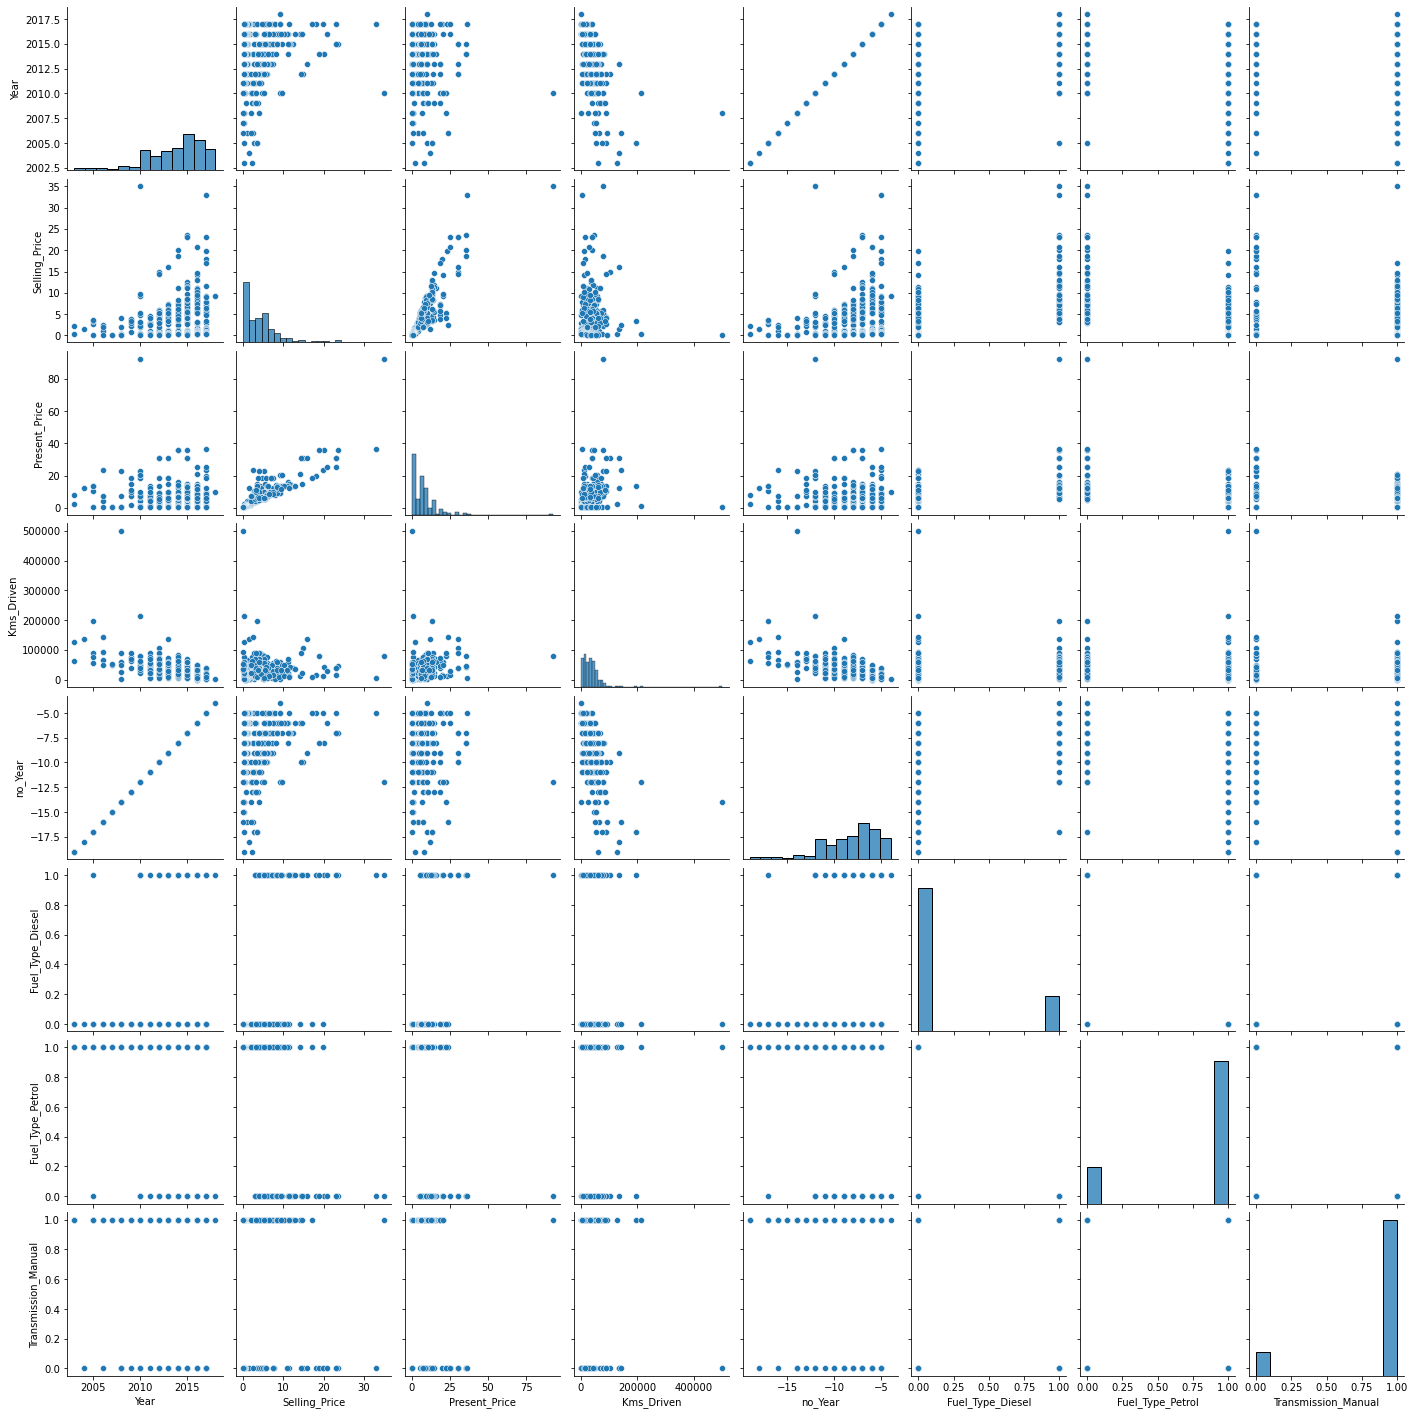

In [17]:
sns.pairplot(final_df)

<AxesSubplot:>

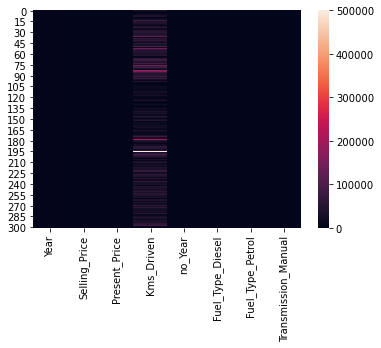

In [18]:
sns.heatmap(final_df)

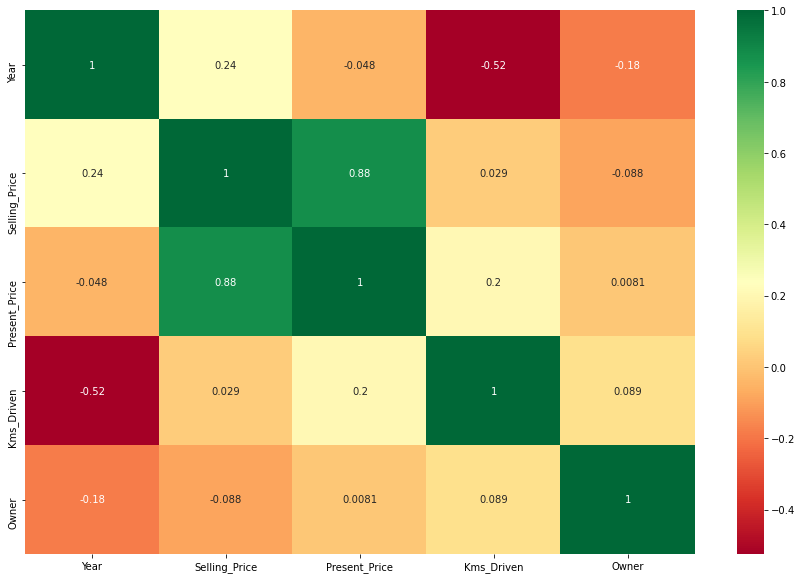

In [37]:
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(15,10))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fuel_Type_Diesel', ylabel='Density'>

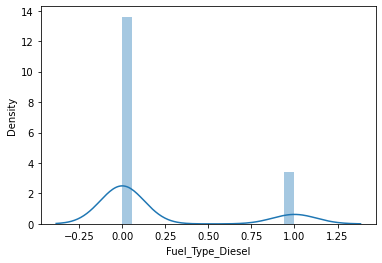

In [20]:
sns.distplot(final_df['Fuel_Type_Diesel'])

In [21]:
x=final_df.iloc[:,1:]
y=final_df.iloc[:,0]


In [22]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

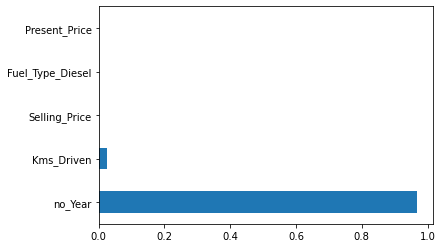

In [23]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

# RandomForestRegressor

In [25]:
from sklearn.ensemble import RandomForestRegressor

In [26]:
# RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [27]:
 #Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [28]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [29]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid)

In [30]:
rf_random.fit(x_train,y_train)

RandomizedSearchCV(estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]})

In [31]:
rf_random.best_estimator_,rf_random.best_params_

(RandomForestRegressor(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=200),
 {'n_estimators': 200,
  'min_samples_split': 5,
  'min_samples_leaf': 2,
  'max_features': 'auto',
  'max_depth': 10})

In [32]:
rf_random.best_score_

0.9962634557526844

In [33]:
pred=rf_random.predict(x_test)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

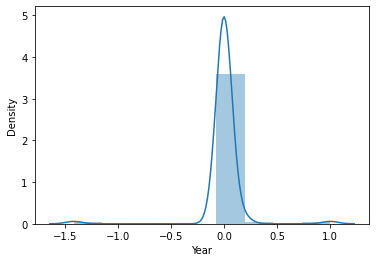

In [34]:
sns.distplot(y_test-pred)

In [36]:
print("MAE",mean_absolute_error(y_test,pred))
print("MSE",mean_squared_error(y_test,pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,pred)))

MAE 0.03459449677309719
MSE 0.03414456229781621
RMSE 0.18478247291833771
